In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import pandas as pd
import networkx as nx
import tensorflow as tf
import numpy as np
from utils.utils import predict
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
model_m_to_s = tf.keras.models.load_model("./model/gbif_batch_128_layer_1024_m_to_s", compile=True)
model_s_to_m = tf.keras.models.load_model("./model/gbif_batch_128_layer_1024_s_to_m", compile=True)

In [3]:
species_features_dummy = pd.read_csv("./data/species_features.csv.gz", index_col=0)
molecule_features_dummy = pd.read_csv("./data/molecule_features.csv.gz", index_col=0)
df_agg = pd.read_csv("./data/lotus_agg_test.csv.gz", index_col=0)

In [4]:
rdkit = pd.read_csv("./data/mol_dummy_rdkit.csv.gz", index_col=0).astype('uint8')
rdkit.columns = rdkit.columns.astype(str)

In [5]:
g_train = nx.read_graphml("./graph/train_graph.gml")
g = nx.read_graphml("./graph/test_graph.gml")
g  = nx.create_empty_copy(g)
g_merged = nx.compose(g_train, g)

In [6]:
df_agg_train = pd.read_csv("./data/lotus_agg_train.csv.gz", index_col=0)

In [7]:
g_test = nx.read_graphml("./graph/test_graph.gml")
g_lotus = nx.compose(g_train, g_test)

In [8]:
sku = pd.concat([df_agg, df_agg_train])

In [9]:
mol = 'O'
data_3 = pd.DataFrame(
    {'molecule': mol,
     'species': list(set(species_features_dummy.index)-set(sku[sku.structure_smiles_2D==mol].organism_name))})

In [10]:
data_3

,molecule,species
0,O,Dendrobium candidum
1,O,Amesia nigricolor
2,O,Phallusia fumigata
3,O,Ozothamnus hookeri
4,O,Parasola setulosa
...,...,...
36436,O,Sideritis glacialis
36437,O,Caesulia axillaris
36438,O,Faramea guianensis
36439,O,Homalocladium platycladum


In [11]:
out_3 = predict(g_lotus,
                model_m_to_s,
                model_s_to_m,
                data_3,
                molecule_features_dummy,
                rdkit,
                species_features_dummy
               )

Converting Inchikeys to SMILES...
Getting missing features...
Converting species taxonomy as numeric...
Converting molecules as numeric...
Checking which model should be used for each row...
Adding missing nodes to the graph...
Converting NetworkX to Stellargraph...
StellarDiGraph: Directed multigraph
 Nodes: 184194, Edges: 869484

 Node types:
  molecule: [147747]
    Features: float32 vector, length 155
    Edge types: molecule-present_in->species
  species: [36447]
    Features: float32 vector, length 69
    Edge types: species-has->molecule

 Edge types:
    species-has->molecule: [434742]
        Weights: all 1 (default)
        Features: none
    molecule-present_in->species: [434742]
        Weights: all 1 (default)
        Features: none
Creating 'forward', 'backward' flow for KNOWN molecule AND species...
Predict both : running molecule to species predictions...
36/36 [==============================] - 5s 151ms/step
Predict both : running species to molecules prediction...
36/

[Text(0.5, 0, 'Probabilities'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Probability of water across all species.')]

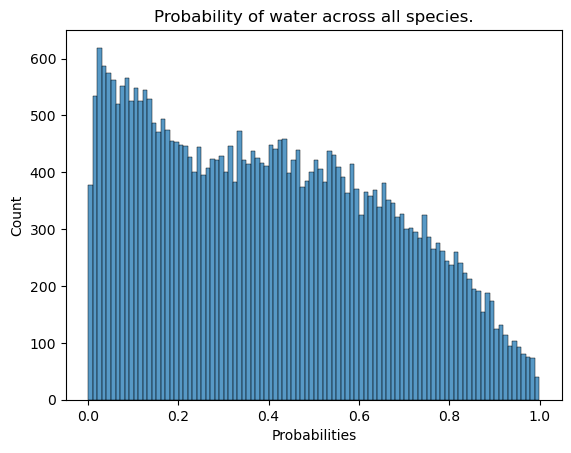

In [12]:
ax_3 = sns.histplot(data=out_3, x=out_3.prob, bins=100)
ax_3.set(xlabel="Probabilities",
        ylabel="Count",
        title="Probability of water across all species.")

In [13]:
out_3[out_3.prob>0.95]

,molecule,species,model,prob
85,O,Tricholoma inamoenum,both_known,0.983647
234,O,Heracleum antasiaticum,both_known,0.960522
260,O,Bauhinia racemosa,both_known,0.967372
338,O,Volvariella volvacea,both_known,0.994126
407,O,Quararibea funebris,both_known,0.952922
...,...,...,...,...
36126,O,Pandanus odorifer,both_known,0.952274
36158,O,Streptomyces celluloflavus,both_known,0.955175
36205,O,Citrus unshiu,both_known,0.958303
36362,O,Amorphophallus eichleri,both_known,0.958737


# Test 4: let's see if cholesterol is present "everywhere"


In [14]:
mol = 'CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C'
data_4 = pd.DataFrame(
    {'molecule': mol,
     'species': list(set(species_features_dummy.index)-set(sku[sku.structure_smiles_2D==mol].organism_name))})

In [15]:
out_4 = predict(g_lotus,
                model_m_to_s,
                model_s_to_m,
                data_4,
                molecule_features_dummy,
                rdkit,
                species_features_dummy
               )

Converting Inchikeys to SMILES...
Getting missing features...
Converting species taxonomy as numeric...
Converting molecules as numeric...
Checking which model should be used for each row...
Adding missing nodes to the graph...
Converting NetworkX to Stellargraph...
StellarDiGraph: Directed multigraph
 Nodes: 184194, Edges: 869484

 Node types:
  molecule: [147747]
    Features: float32 vector, length 155
    Edge types: molecule-present_in->species
  species: [36447]
    Features: float32 vector, length 69
    Edge types: species-has->molecule

 Edge types:
    species-has->molecule: [434742]
        Weights: all 1 (default)
        Features: none
    molecule-present_in->species: [434742]
        Weights: all 1 (default)
        Features: none
Creating 'forward', 'backward' flow for KNOWN molecule AND species...
Predict both : running molecule to species predictions...
36/36 [==============================] - 8s 209ms/step
Predict both : running species to molecules prediction...
36/

[Text(0.5, 0, 'Probabilities'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Probability of cholesterol across all species.')]

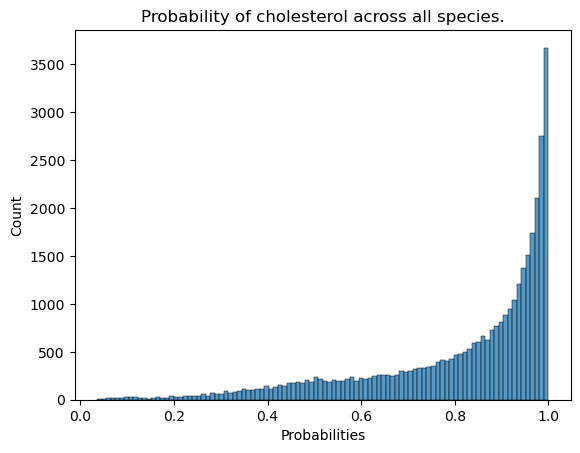

In [16]:
ax_4 = sns.histplot(data=out_4, x=out_4.prob, bins=100)
ax_4.set(xlabel="Probabilities",
        ylabel="Count",
        title="Probability of cholesterol across all species.")

In [17]:
out_4[out_4.prob>0.99]

,molecule,species,model,prob
6,CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C,Houttuynia cordata,both_known,0.997259
19,CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C,Engelhardia spicata,both_known,0.994340
25,CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C,Petunia patagonica,both_known,0.997658
31,CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C,Panicum virgatum,both_known,0.991013
32,CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C,Isotrema tomentosum,both_known,0.994884
...,...,...,...,...
35884,CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C,Callitris columellaris,both_known,0.997667
35895,CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C,Aeridostachya robusta,both_known,0.997589
35901,CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C,Monascus purpureus,both_known,0.991729
35905,CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C,Neofinetia falcata,both_known,0.997135


# Test 5: test with a more rare molecule : Erythromycin

In [18]:
mol = 'CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(OC2OC(C)CC(N(C)C)C2O)C(C)(O)CC(C)C(=O)C(C)C(O)C1(C)O'
data_5 = pd.DataFrame(
    {'molecule': mol,
     'species': list(set(species_features_dummy.index)-set(sku[sku.structure_smiles_2D==mol].organism_name))}
)

In [19]:
out_5 = predict(g_lotus,
                model_m_to_s,
                model_s_to_m,
                data_5,
                molecule_features_dummy,
                rdkit,
                species_features_dummy
               )

Converting Inchikeys to SMILES...
Getting missing features...
Converting species taxonomy as numeric...
Converting molecules as numeric...
Checking which model should be used for each row...
Adding missing nodes to the graph...
Converting NetworkX to Stellargraph...
StellarDiGraph: Directed multigraph
 Nodes: 184194, Edges: 869484

 Node types:
  molecule: [147747]
    Features: float32 vector, length 155
    Edge types: molecule-present_in->species
  species: [36447]
    Features: float32 vector, length 69
    Edge types: species-has->molecule

 Edge types:
    species-has->molecule: [434742]
        Weights: all 1 (default)
        Features: none
    molecule-present_in->species: [434742]
        Weights: all 1 (default)
        Features: none
Creating 'forward', 'backward' flow for KNOWN molecule AND species...
Predict both : running molecule to species predictions...
36/36 [==============================] - 6s 156ms/step
Predict both : running species to molecules prediction...
36/

[Text(0.5, 0, 'Probabilities'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Probability of erythromycin across all species.')]

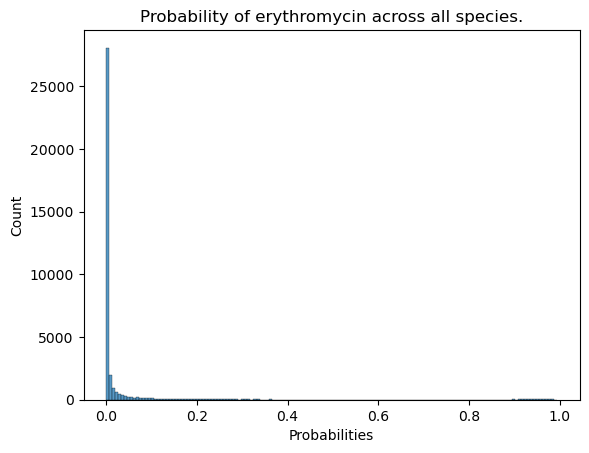

In [20]:
ax_5 = sns.histplot(data=out_5, x=out_5.prob, bins=150,)
ax_5.set(xlabel="Probabilities",
        ylabel="Count",
        title="Probability of erythromycin across all species.")

In [21]:
out_5[out_5.prob>0.95]

,molecule,species,model,prob
113,CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(O...,Streptomyces xanthochromogenes,both_known,0.960512
807,CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(O...,Streptomyces griseoruber,both_known,0.970113
1005,CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(O...,Dactylosporangium,both_known,0.951608
1209,CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(O...,Streptomyces olindensis,both_known,0.956288
1300,CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(O...,Streptomyces chartreusis,both_known,0.986175
...,...,...,...,...
36079,CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(O...,Streptomyces atroolivaceus,both_known,0.976787
36194,CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(O...,Streptomyces capoamus,both_known,0.961547
36216,CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(O...,Streptomyces diastatochromogenes,both_known,0.994006
36325,CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(O...,Streptomyces cyanogenus,both_known,0.974416


In [22]:
out_5_latex = out_5[out_5.prob>0.989].copy()
out_5_latex['molecule'] = "Erythromycin"
out_5_latex.drop(columns='model', inplace=True)
out_5_latex.rename(columns={
    "molecule": "Molecule",
    "species": "Species",
    "prob": "Probability"
}, inplace=True)

In [23]:
print(out_5_latex.to_latex(
    index=False,
    float_format="{:.4f}".format,
)
)

\begin{tabular}{llr}
\toprule
Molecule & Species & Probability \\
\midrule
Erythromycin & Streptomyces ambofaciens & 0.9891 \\
Erythromycin & Kitasatospora aureofaciens & 0.9927 \\
Erythromycin & Streptomyces albogriseolus & 0.9894 \\
Erythromycin & Streptomyces libani & 0.9917 \\
Erythromycin & Streptomyces violaceusniger & 0.9911 \\
Erythromycin & Streptomyces ansochromogenes & 0.9914 \\
Erythromycin & Streptomyces & 0.9929 \\
Erythromycin & Streptomyces albus & 0.9915 \\
Erythromycin & Streptomyces diastatochromogenes & 0.9940 \\
\bottomrule
\end{tabular}



# Test adding just one edge to an unkown molecule to see the difference

In [24]:
mol = 'CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C'
data_6 = pd.DataFrame(
    {'molecule': mol,
     'species': list(set(species_features_dummy.index)-set(sku[sku.structure_smiles_2D==mol].organism_name))})

In [25]:
g_lotus.add_node('CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C', label='molecule')
g_lotus.add_edge('CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C', 'Mus musculus', label='present_in')
g_lotus.add_edge('Mus musculus','CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C', label='has')
g_lotus.add_edge('CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C', 'Dicranum japonicum', label='present_in')
g_lotus.add_edge( 'Dicranum japonicum', 'CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C', label='has')
g_lotus.add_edge('CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C', 'Streptomyces atratus', label='present_in')
g_lotus.add_edge('Streptomyces atratus','CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C', label='has')
g_lotus.add_edge('CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C','Campylopus richardii', label='present_in')
g_lotus.add_edge('Campylopus richardii','CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C', label='has')
g_lotus.add_edge('CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C','Suaeda aegyptiaca', label='present_in')
g_lotus.add_edge('Suaeda aegyptiaca','CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C', label='has')

In [26]:
from utils.molecules import smiles_to_classyfire, smiles_to_fingerprint

In [27]:
chol_classy = smiles_to_classyfire(['CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C'])

In [28]:
chol_fp = smiles_to_fingerprint(['CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C'])
chol_fp.columns  = chol_fp.columns.astype(str)

In [29]:
out_6 = predict(g_lotus,
                model_m_to_s,
                model_s_to_m,
                data_6,
                pd.concat([molecule_features_dummy, chol_classy]),
                pd.concat([rdkit, chol_fp]),
                species_features_dummy
               )

Converting Inchikeys to SMILES...
Getting missing features...
Converting species taxonomy as numeric...
Converting molecules as numeric...
Checking which model should be used for each row...
Adding missing nodes to the graph...
Converting NetworkX to Stellargraph...
StellarDiGraph: Directed multigraph
 Nodes: 184195, Edges: 869494

 Node types:
  molecule: [147748]
    Features: float32 vector, length 155
    Edge types: molecule-present_in->species
  species: [36447]
    Features: float32 vector, length 69
    Edge types: species-has->molecule

 Edge types:
    species-has->molecule: [434747]
        Weights: all 1 (default)
        Features: none
    molecule-present_in->species: [434747]
        Weights: all 1 (default)
        Features: none
Creating 'forward', 'backward' flow for KNOWN molecule AND species...
Predict both : running molecule to species predictions...
36/36 [==============================] - 5s 148ms/step
Predict both : running species to molecules prediction...
36/

(array([  4.,  12.,  23.,  29.,  32.,  16.,  20.,  27.,  13.,  27.,  28.,
         17.,  22.,  20.,  27.,  36.,  38.,  40.,  25.,  38.,  45.,  42.,
         47.,  57.,  52.,  51.,  49.,  60.,  58.,  69.,  62.,  67.,  71.,
         79.,  77.,  70.,  80.,  66.,  71.,  85.,  83.,  76.,  88.,  73.,
         85.,  89.,  89., 101.,  89.,  83.,  74.,  89.,  97.,  93., 104.,
         95., 115., 112., 128., 108., 128.,  93., 108., 109., 110., 116.,
        106., 120., 139., 114., 119., 111., 114., 125., 125., 135., 118.,
        137., 136., 140., 117., 133., 119., 135., 119., 127., 135., 142.,
        131., 133., 144., 127., 132., 130., 146., 160., 130., 158., 124.,
        145., 165., 136., 150., 142., 131., 168., 156., 167., 168., 157.,
        200., 165., 164., 202., 173., 176., 176., 186., 170., 213., 207.,
        168., 176., 180., 200., 187., 208., 229., 236., 220., 205., 209.,
        207., 229., 197., 221., 243., 246., 235., 234., 245., 241., 252.,
        250., 261., 279., 292., 275., 

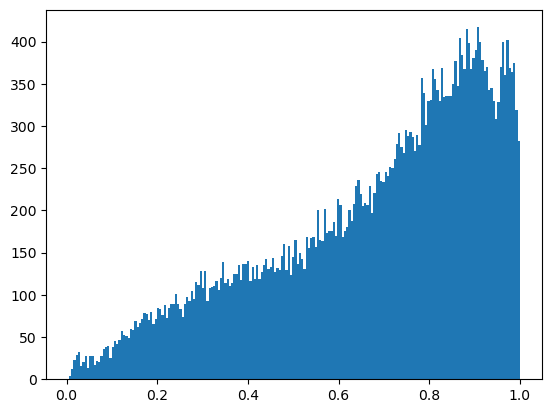

In [30]:
plt.hist(out_6.prob, bins=200)

In [31]:
out_6[out_6.prob>0.99]

,molecule,species,model,prob
194,CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C,Cymbopogon parkeri,both_known,0.994439
266,CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C,Pseudomonas aeruginosa,both_known,0.999292
268,CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C,Cystoseira barbata,both_known,0.998486
312,CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C,Nostoc carneum,both_known,0.993946
338,CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C,Volvariella volvacea,both_known,0.990184
...,...,...,...,...
36264,CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C,Deinococcus geothermalis,both_known,0.997169
36301,CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C,Oryza sativa,both_known,0.992104
36317,CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C,Streptomyces purpurogeneiscleroticus,both_known,0.990425
36381,CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C,Corchorus aestuans,both_known,0.991107
